In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('DelayedFlights.csv')
data.head()

/Library/Python/2.7/site-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/Library/Python/2.7/site-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/Library/Python/2.7/site-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/Library/Python/2.7/site-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import hashing, tslib
/Library/Python/2.7/site-packages/pandas/core/indexes/base.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Exp

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
data.dtypes

Unnamed: 0             int64
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              int64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
Departure            datetime64[ns]
dtypes: datetime64[ns](1), float64(13

In [4]:
data.drop(data.columns[0], inplace=True, axis=1)

In [5]:
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


Transforming time-related columns to datetime

In [26]:
data['DepTime'] = data['DepTime'].astype(int)
data.loc[data['DepTime'] == 2400, 'DepTime'] = 0
t1 = data['DepTime'].astype(str).str.zfill(4)
data['Departure'] = t1.str[0:2] + ':' + t1.str[2:4] + ':00'
data['Departure'] = pd.to_datetime(data['Departure'], format="%H:%M:%S")#.dt.time


data['CRSDepTime'] = data['CRSDepTime'].astype(int)
data.loc[data['CRSDepTime'] == 2400, 'CRSDepTime'] = 0
t1 = data['CRSDepTime'].astype(str).str.zfill(4)
data['ScheduledDeparture'] = t1.str[0:2] + ':' + t1.str[2:4] + ':00'
data['ScheduledDeparture'] = pd.to_datetime(data['ScheduledDeparture'], format="%H:%M:%S")#.dt.time

data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Departure,ScheduledDeparture
0,2008,1,3,4,2003,1955,2211.0,2225,WN,335,...,0,N,0,NaN,NaN,NaN,NaN,NaN,1900-01-01 20:03:00,1900-01-01 19:55:00
1,2008,1,3,4,754,735,1002.0,1000,WN,3231,...,0,N,0,NaN,NaN,NaN,NaN,NaN,1900-01-01 07:54:00,1900-01-01 07:35:00
2,2008,1,3,4,628,620,804.0,750,WN,448,...,0,N,0,NaN,NaN,NaN,NaN,NaN,1900-01-01 06:28:00,1900-01-01 06:20:00
3,2008,1,3,4,1829,1755,1959.0,1925,WN,3920,...,0,N,0,2.0,0.0,0.0,0.0,32.0,1900-01-01 18:29:00,1900-01-01 17:55:00
4,2008,1,3,4,1940,1915,2121.0,2110,WN,378,...,0,N,0,NaN,NaN,NaN,NaN,NaN,1900-01-01 19:40:00,1900-01-01 19:15:00


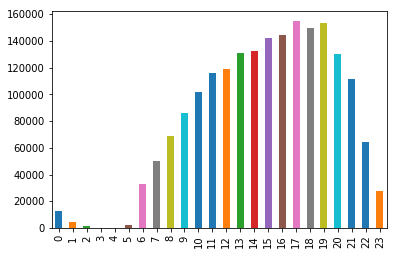

In [36]:
(data['Departure'].dt.hour).value_counts().loc[range(0,24)].plot(kind='bar')

In [35]:
data['DepartureDelay'] = data['Departure'] - data['ScheduledDeparture']
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Departure,ScheduledDeparture,DepartureDelay
0,2008,1,3,4,2003,1955,2211.0,2225,WN,335,...,N,0,NaN,NaN,NaN,NaN,NaN,1900-01-01 20:03:00,1900-01-01 19:55:00,00:08:00
1,2008,1,3,4,754,735,1002.0,1000,WN,3231,...,N,0,NaN,NaN,NaN,NaN,NaN,1900-01-01 07:54:00,1900-01-01 07:35:00,00:19:00
2,2008,1,3,4,628,620,804.0,750,WN,448,...,N,0,NaN,NaN,NaN,NaN,NaN,1900-01-01 06:28:00,1900-01-01 06:20:00,00:08:00
3,2008,1,3,4,1829,1755,1959.0,1925,WN,3920,...,N,0,2.0,0.0,0.0,0.0,32.0,1900-01-01 18:29:00,1900-01-01 17:55:00,00:34:00
4,2008,1,3,4,1940,1915,2121.0,2110,WN,378,...,N,0,NaN,NaN,NaN,NaN,NaN,1900-01-01 19:40:00,1900-01-01 19:15:00,00:25:00


In [38]:
data[data['WeatherDelay'] != 'NaN'].value_counts()

0.0       1148570
10.0         2868
6.0          2738
15.0         2709
7.0          2527
8.0          2522
9.0          2302
20.0         2083
5.0          2061
11.0         2026
12.0         1985
4.0          1969
16.0         1955
3.0          1936
17.0         1917
2.0          1875
13.0         1868
14.0         1866
18.0         1805
1.0          1747
19.0         1659
25.0         1602
30.0         1460
21.0         1450
22.0         1399
23.0         1347
24.0         1258
26.0         1224
28.0         1202
27.0         1145
           ...   
717.0           1
710.0           1
708.0           1
479.0           1
741.0           1
702.0           1
699.0           1
698.0           1
697.0           1
1070.0          1
685.0           1
735.0           1
742.0           1
789.0           1
765.0           1
779.0           1
777.0           1
775.0           1
1297.0          1
470.0           1
528.0           1
760.0           1
744.0           1
756.0           1
420.0     